## Imports and Dataframe Attributes

In [23]:
#Import to process file
import pandas as pd
import csv
import os
import numpy as np

#File directory
file_directory = "combined_data.csv"

In [24]:
#Read file 
df = pd.read_csv(file_directory)
df.head()

,max_peak,min_peak,previous_max_peak,previous_min_peak,next_max_peak,next_min_peak,energy,entropy,dist_bw_top_2_peaks,dist_bw_top_3_peaks_avg,dist_bw_top_3_peaks_std,top_2_amp,bottom_2_amp,bpm
0,0.801122,-0.490303,0.801122,-0.490303,0.452192,-0.407053,4.626906,0.590803,1,1.333333,0.471405,0.736382,-0.481082,76
1,0.418405,-0.567802,0.287008,-0.484402,-0.113645,0.240156,3.179439,0.767557,-26,17.333333,11.556624,0.404162,-0.556460,76
2,0.499364,-0.648295,0.289821,0.289821,0.415715,-0.648295,3.786602,0.699574,-1,20.666667,13.912425,0.491783,-0.612012,76
3,0.791849,-0.900124,0.611972,-0.561362,0.650475,-0.374350,8.854468,-0.908454,-28,18.666667,12.498889,0.749855,-0.897742,76
4,0.754816,-0.588664,0.262265,-0.588664,0.557325,-0.512441,4.789972,-0.211939,13,8.666667,5.436502,0.676195,-0.561387,76


In [25]:
#Row x columns
df.shape

(1103, 14)

## Random Forest Approach

In [32]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, 
                                                                            test_size = 0.25, random_state = 42)

In [33]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (827, 13)
Training Labels Shape: (827,)
Testing Features Shape: (276, 13)
Testing Labels Shape: (276,)


In [48]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, oob_score = True)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

## Different Accuracy Measurements

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, train_features, train_labels, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))                                   

Accuracy: 0.02 (+/- 0.11)


In [36]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'BPM.')

Mean Absolute Error: 3.24 BPM.


In [37]:
mse = sklearn.metrics.mean_squared_error(test_labels, predictions)
print('Mean Squared Error:',round(mse, 2))
print('Note that values close to 0 are better.')

Mean Squared Error: 14.83
Note that values close to 0 are better.


In [38]:
oob_error = 1 - rf.oob_score_
oob_error

0.96273011013258813

## Looking at the Results

In [39]:
predictions[0:10]

array([ 69.035,  69.614,  66.421,  68.223,  67.57 ,  68.08 ,  68.74 ,
        69.457,  66.378,  65.178])

In [40]:
test_labels[0:10]

array([ 74.,  75.,  70.,  69.,  71.,  71.,  69.,  64.,  63.,  69.])

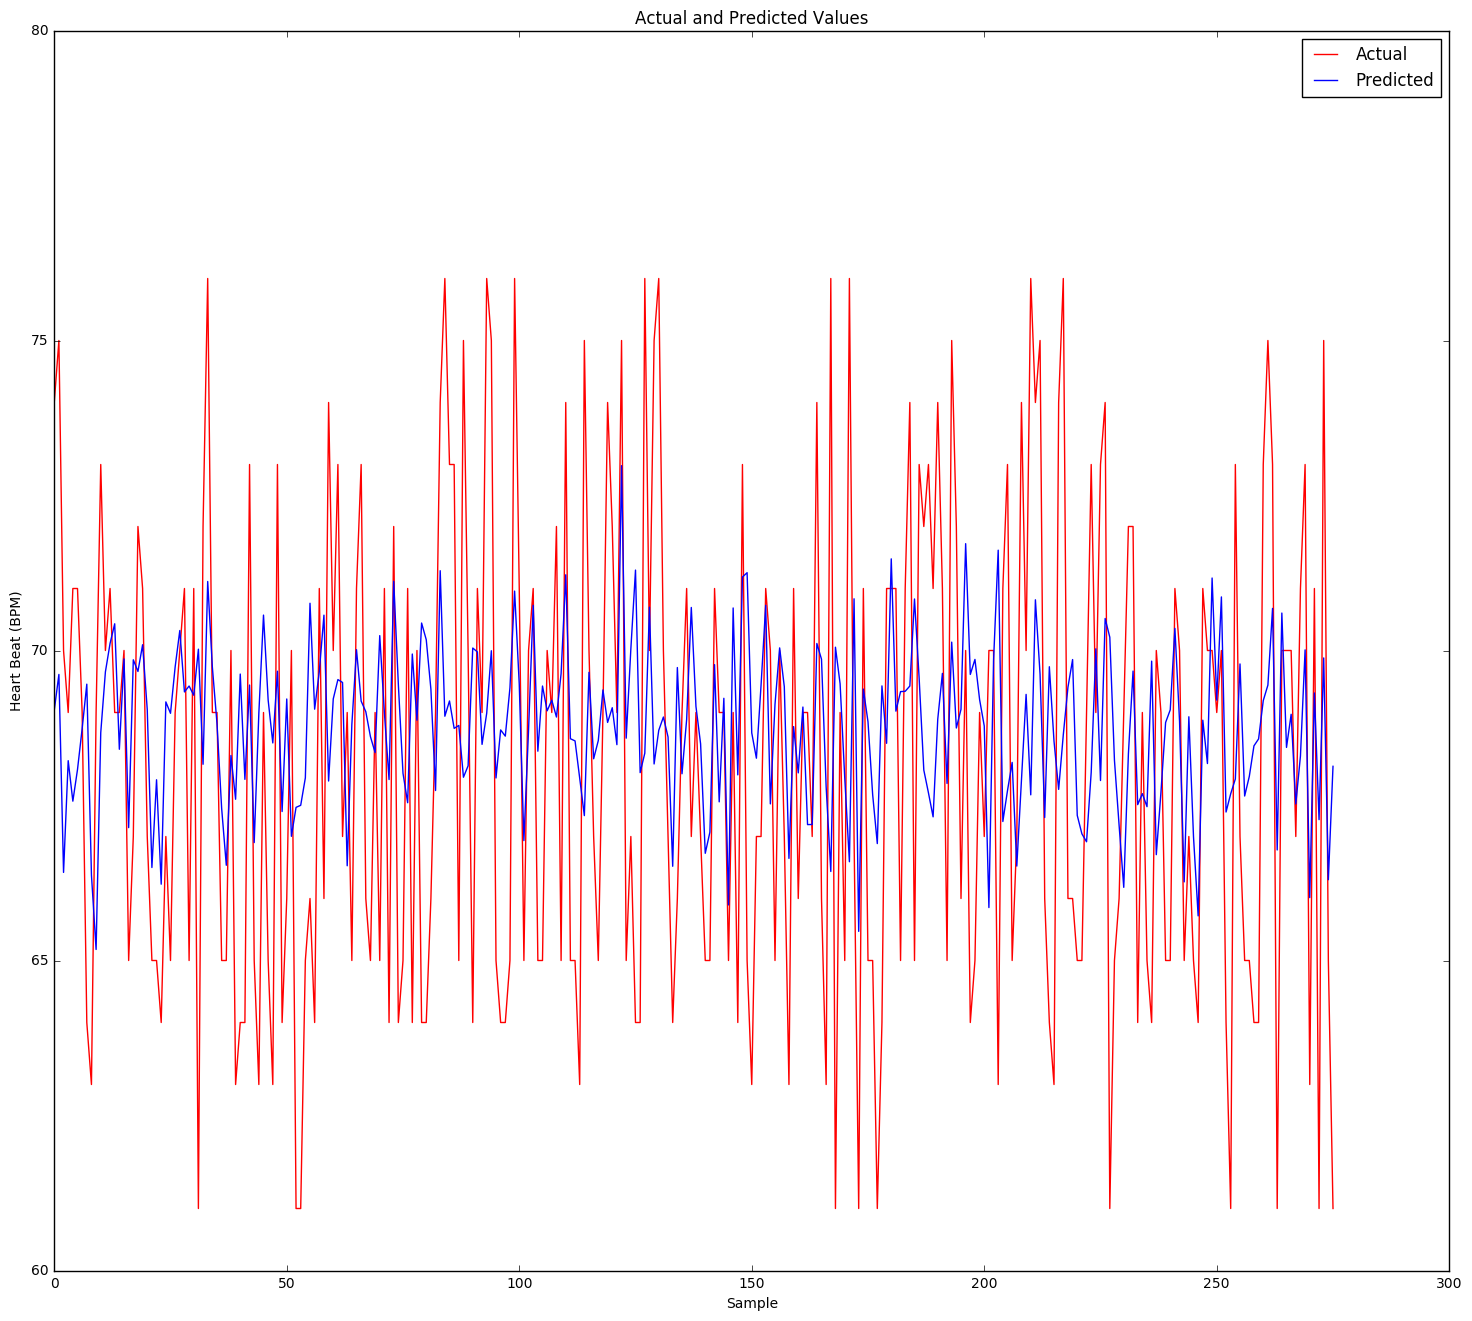

In [50]:
# Plot the actual values
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(test_labels, '-b', color = 'red', label = 'Actual')
plt.plot(predictions, '-b', label = 'Predicted')
plt.ylim(60,80)

plt.legend()

plt.xlabel('Sample')
plt.ylabel('Heart Beat (BPM)'); plt.title('Actual and Predicted Values');

plt.show()

## Investigating Feature Importance

In [42]:
df.columns.drop('bpm')

Index(['max_peak', 'min_peak', 'previous_max_peak', 'previous_min_peak',
       'next_max_peak', 'next_min_peak', 'energy', 'entropy',
       'dist_bw_top_2_peaks', 'dist_bw_top_3_peaks_avg',
       'dist_bw_top_3_peaks_std', 'top_2_amp', 'bottom_2_amp'],
      dtype='object')

In [43]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 2), rf.feature_importances_), df.columns.drop('bpm')), 
             reverse=True))

Features sorted by their score:
[(0.11, 'previous_min_peak'), (0.11, 'entropy'), (0.089999999999999997, 'next_min_peak'), (0.089999999999999997, 'next_max_peak'), (0.080000000000000002, 'previous_max_peak'), (0.070000000000000007, 'top_2_amp'), (0.070000000000000007, 'min_peak'), (0.070000000000000007, 'max_peak'), (0.070000000000000007, 'energy'), (0.070000000000000007, 'bottom_2_amp'), (0.059999999999999998, 'dist_bw_top_3_peaks_avg'), (0.050000000000000003, 'dist_bw_top_3_peaks_std'), (0.050000000000000003, 'dist_bw_top_2_peaks')]


In [51]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)>